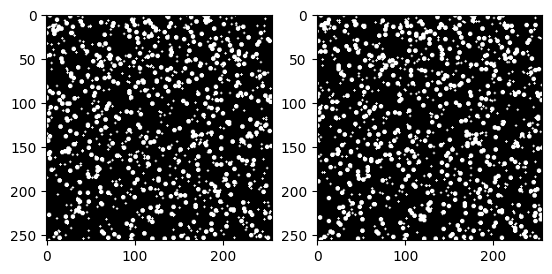

In [131]:
import numpy as np
from PIL import Image, ImageDraw
from matplotlib import pyplot as plt

# Step 1: Generate the Taylor-Green vortex velocity field
def taylor_green_vortex(x, y):
    u = np.sin(x) * np.cos(y)
    v = -np.cos(x) * np.sin(y)
    return u, v

# Step 2: Create a random distribution of particles
def initialize_particles(num_particles, xlim, ylim):
    x = np.random.uniform(xlim[0], xlim[1], num_particles)
    y = np.random.uniform(ylim[0], ylim[1], num_particles)
    return x, y

# Step 3: Move the particles according to the vortex field
def move_particles(x, y, dt, xlim, ylim):
    u, v = taylor_green_vortex(x, y)
    x_new = x + u * dt
    y_new = y + v * dt
    # Ensure particles stay within the limits
    x_new = np.mod(x_new - xlim[0], xlim[1] - xlim[0]) + xlim[0]
    y_new = np.mod(y_new - ylim[0], ylim[1] - ylim[0]) + ylim[0]
    return x_new, y_new

# Step 4: Create images with particles
def create_image(x, y, size, img_size):
    img = Image.new('L', (img_size, img_size), 0)
    draw = ImageDraw.Draw(img)
    for (x_i, y_i) in zip(x, y):
        radius = np.random.randint(1, 3)
        draw.ellipse((x_i - radius, y_i - radius, x_i + radius, y_i + radius), fill=255)
    return np.array(img, dtype=np.uint8)

# Parameters
num_particles = 1000
img_size = 256
xlim = (0, 2*np.pi)
ylim = (0, 2*np.pi)
dt = .1

# Scale particles to fit the image size
scale_x = img_size / (xlim[1] - xlim[0])
scale_y = img_size / (ylim[1] - ylim[0])

# Initialize particles
x1, y1 = initialize_particles(num_particles, xlim, ylim)

# Move particles
x2, y2 = move_particles(x1, y1, dt, xlim, ylim)

# Scale positions to image size
x1_img = x1 * scale_x
y1_img = y1 * scale_y
x2_img = x2 * scale_x
y2_img = y2 * scale_y

# Create images
image1 = create_image(x1_img, y1_img, num_particles, img_size)
image2 = create_image(x2_img, y2_img, num_particles, img_size)

# Save images
# image1.save('piv_image1.png')
# image2.save('piv_image2.png')

# Display images
fig, ax = plt.subplots(1,2)
ax[0].imshow(image1, cmap='gray')
ax[1].imshow(image2, cmap='gray')


Text(0.5, 0, 'Velocity difference in units of the maximum velocity')

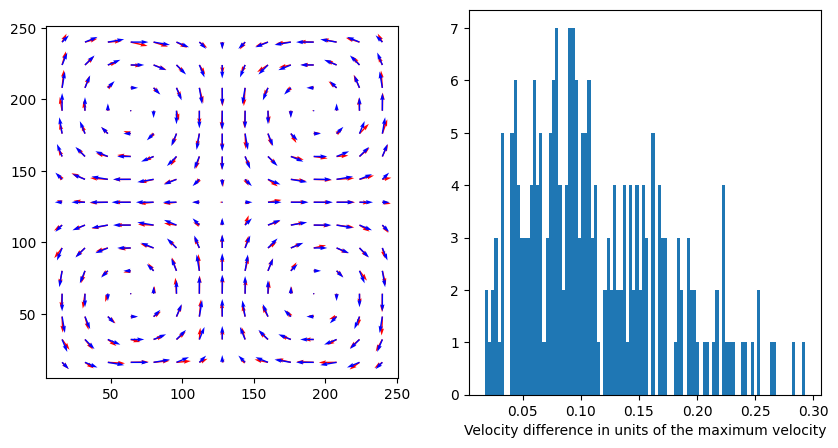

In [132]:
from openpiv.piv import simple_piv
x,y,u,v,s2n = simple_piv(image1, image2, plot=False);
ug, vg = taylor_green_vortex(x/scale_x, y/scale_y)
ug *= dt * scale_x
vg *= dt * scale_y

velocity_scale = ((ug**2 + vg**2)**0.5).max()

fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].quiver(x, y, u, v, color='r',scale=75)
ax[0].quiver(x, y, ug, vg, color='b',scale=75)
# cm = ax[1].quiver(x, y, u-ug, v-vg, ((u-ug)**2 + (v-vg)**2)**0.5,scale=10)
ax[0].set_aspect('equal')
# fig.colorbar(cm, ax=ax[1], label='Velocity difference in pix')
ax[1].hist((((u-ug)**2 + (v-vg)**2)**0.5).flatten()/velocity_scale, bins=100);
ax[1].set_aspect('auto')
ax[1].set_xlabel('Velocity difference in units of the maximum velocity')

